In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io import gbq
from google.cloud import bigquery
import seaborn as sns
from scipy import stats
from statsmodels.stats.weightstats import ztest as ztest
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA

------------------------------------------------------------------------------------------------------------------------
SECTION 1:

Prepare and upload training datasets for final_data_training_balanced_multiclass

In [20]:
Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.outputs.final_data_training_balanced_multiclass`
'''

project_id = 'berkeley-data-discovery-2023'
dfg = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)
dfg

,per_id_proxy,income_range,p_city,nem,avg_arrears,avg_monthly_kwh,max_monthly_kwh,avg_month_bill,max_month_bill,num_vehicles_owner_total,...,r_morning_over_noon,r_evening_over_noon,r_noon_over_total,r_night_over_day,r_weekday_over_weekend,r_mean_over_max,r_min_over_mean,s_variance,s_diff,s_num_peaks
0,9026,high income,SUNOL,No,0.000000,360.964437,797.0000,38.352745,66.10,8,...,1.315571,1.883578,0.797113,0.685280,1.108993,0.143047,0.023307,0.133559,0.138367,498
1,12161,low income,TRACY,No,2.144457,459.729730,949.0000,56.874595,139.68,0,...,1.175612,2.429692,0.617513,1.185644,1.038038,0.100237,0.000000,0.668279,0.357095,2032
2,24388,high income,SUNOL,No,0.506976,616.435559,1025.2680,67.848824,119.29,4,...,1.126104,1.594048,0.994840,0.284088,1.146457,0.120646,0.016517,0.445615,0.251049,540
3,27128,high income,Dublin,No,0.431902,333.707725,526.8186,36.356275,61.29,4,...,0.807493,1.343290,1.109075,0.457250,0.950610,0.061967,0.017416,0.122856,0.130191,708
4,40078,high income,SUNOL,No,0.000000,765.066165,1178.0000,85.400784,154.39,3,...,0.669286,1.847754,0.876628,0.521998,1.127725,0.141052,0.014652,0.837135,0.338544,688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110752,477642,high income,CASTRO VALLEY,No,0.290439,708.392139,968.6550,78.420588,132.74,5,...,1.157018,1.554878,0.860385,0.730748,0.990734,0.151797,0.226348,0.531635,0.345829,653
110753,477822,middle income,CASTRO VALLEY,No,1.390585,285.269692,399.7760,31.036471,47.16,1,...,1.036145,2.127882,0.799930,0.471104,0.818500,0.117003,0.136323,0.058364,0.106853,644
110754,477923,high income,CASTRO VALLEY,No,0.036780,328.077310,981.0000,35.685600,75.91,0,...,1.358213,1.549212,0.855121,0.529913,0.824595,0.069911,0.386728,0.203453,0.182119,1096
110755,478061,high income,CASTRO VALLEY,No,0.000000,705.794373,1265.6582,77.327255,173.59,6,...,1.283600,1.643107,0.746565,1.071500,0.996393,0.231578,0.239419,0.421972,0.168699,173


In [21]:
df2 = dfg.copy()
df2['income_range'].value_counts()

high income      36919
low income       36919
middle income    36919
Name: income_range, dtype: int64

In [22]:
df2['ces_score'] = df2['ces_score'].astype(float)
df2['nem'] = df2['nem'].map({'Yes': 1, 'No': 0})
df2

,per_id_proxy,income_range,p_city,nem,avg_arrears,avg_monthly_kwh,max_monthly_kwh,avg_month_bill,max_month_bill,num_vehicles_owner_total,...,r_morning_over_noon,r_evening_over_noon,r_noon_over_total,r_night_over_day,r_weekday_over_weekend,r_mean_over_max,r_min_over_mean,s_variance,s_diff,s_num_peaks
0,9026,high income,SUNOL,0,0.000000,360.964437,797.0000,38.352745,66.10,8,...,1.315571,1.883578,0.797113,0.685280,1.108993,0.143047,0.023307,0.133559,0.138367,498
1,12161,low income,TRACY,0,2.144457,459.729730,949.0000,56.874595,139.68,0,...,1.175612,2.429692,0.617513,1.185644,1.038038,0.100237,0.000000,0.668279,0.357095,2032
2,24388,high income,SUNOL,0,0.506976,616.435559,1025.2680,67.848824,119.29,4,...,1.126104,1.594048,0.994840,0.284088,1.146457,0.120646,0.016517,0.445615,0.251049,540
3,27128,high income,Dublin,0,0.431902,333.707725,526.8186,36.356275,61.29,4,...,0.807493,1.343290,1.109075,0.457250,0.950610,0.061967,0.017416,0.122856,0.130191,708
4,40078,high income,SUNOL,0,0.000000,765.066165,1178.0000,85.400784,154.39,3,...,0.669286,1.847754,0.876628,0.521998,1.127725,0.141052,0.014652,0.837135,0.338544,688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110752,477642,high income,CASTRO VALLEY,0,0.290439,708.392139,968.6550,78.420588,132.74,5,...,1.157018,1.554878,0.860385,0.730748,0.990734,0.151797,0.226348,0.531635,0.345829,653
110753,477822,middle income,CASTRO VALLEY,0,1.390585,285.269692,399.7760,31.036471,47.16,1,...,1.036145,2.127882,0.799930,0.471104,0.818500,0.117003,0.136323,0.058364,0.106853,644
110754,477923,high income,CASTRO VALLEY,0,0.036780,328.077310,981.0000,35.685600,75.91,0,...,1.358213,1.549212,0.855121,0.529913,0.824595,0.069911,0.386728,0.203453,0.182119,1096
110755,478061,high income,CASTRO VALLEY,0,0.000000,705.794373,1265.6582,77.327255,173.59,6,...,1.283600,1.643107,0.746565,1.071500,0.996393,0.231578,0.239419,0.421972,0.168699,173


In [24]:
X = df2.iloc[:,2:]
X = pd.get_dummies(X)
y = df2.iloc[:,1]
X

,nem,avg_arrears,avg_monthly_kwh,max_monthly_kwh,avg_month_bill,max_month_bill,num_vehicles_owner_total,TotalNetValue,ces_score,c_total,...,p_city_SAN LEANDRO,p_city_SAN LORENZO,p_city_SUNOL,p_city_TRACY,p_city_UNION CITY,opportunity_flag_High Resource,opportunity_flag_High Segregation & Poverty,opportunity_flag_Highest Resource,opportunity_flag_Low Resource,opportunity_flag_Moderate Resource
0,0,0.000000,360.964437,797.0000,38.352745,66.10,8,342126.0,6.56,0.479264,...,0,0,1,0,0,1,0,0,0,0
1,0,2.144457,459.729730,949.0000,56.874595,139.68,0,1730002.0,16.38,0.682413,...,0,0,0,1,0,0,0,0,1,0
2,0,0.506976,616.435559,1025.2680,67.848824,119.29,4,550600.0,6.56,0.764048,...,0,0,1,0,0,1,0,0,0,0
3,0,0.431902,333.707725,526.8186,36.356275,61.29,4,0.0,11.58,0.405381,...,0,0,0,0,0,0,0,1,0,0
4,0,0.000000,765.066165,1178.0000,85.400784,154.39,3,644039.0,6.56,1.005335,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110752,0,0.290439,708.392139,968.6550,78.420588,132.74,5,937110.0,13.69,1.002438,...,0,0,0,0,0,1,0,0,0,0
110753,0,1.390585,285.269692,399.7760,31.036471,47.16,1,76446.0,19.73,0.342937,...,0,0,0,0,0,0,0,0,0,1
110754,0,0.036780,328.077310,981.0000,35.685600,75.91,0,459001.0,6.18,0.390456,...,0,0,0,0,0,0,0,0,0,1
110755,0,0.000000,705.794373,1265.6582,77.327255,173.59,6,354804.0,13.97,1.087050,...,0,0,0,0,0,1,0,0,0,0


PCA Training Dataset Preparation

In [25]:
#scale features to reduce skew
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#define PCA model to use
pca = PCA(n_components=0.90, whiten=True)

#fit PCA model to data
pca_fit = pca.fit(X_scaled)

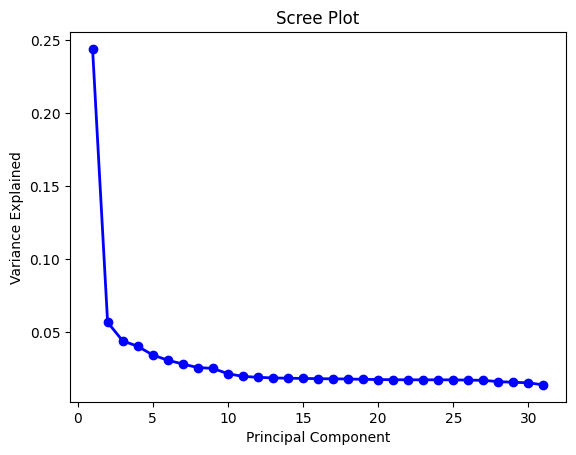

In [26]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Text(0, 0.5, 'Explained variance (%)')

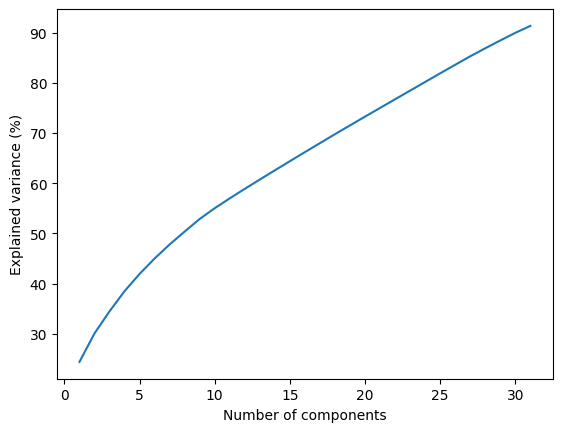

In [27]:
components = len(pca.explained_variance_ratio_)

# Explained Variance Plot
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Model 3: Select the most important features from PCA, remove colinear features (e.g. c_weekday and c_total), and train model.

In [31]:
pca_components = abs(pca.components_)
print('Top 5 most important features in the top 5 principal components')
print('===============================================')
for row in range(5):
    # get the indices of the top 5 values in each row
    temp = np.argpartition(-(pca_components[row]),5)
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:5]
    feature_names = X.columns[indices].to_list()
    values = [pca_components[row][i] for i in indices]
    # print the top 5 feature names
    print(f'Component {row + 1}: {dict(zip(feature_names, values))}')

Top 5 most important features in the top 5 principal components
Component 1: {'c_weekday': 0.26269188601538523, 'c_total': 0.2626867679687044, 'c_weekend': 0.26206479805095834, 'c_day': 0.25990741466650247, 'c_morning': 0.25609886483690564}
Component 2: {'ces_score': 0.3504211332223907, 'nem': 0.3199903818326915, 'opportunity_flag_Low Resource': 0.3007630569316234, 't_above_one_kwh': 0.26639221014918424, 'r_noon_over_total': 0.2547907451884311}
Component 3: {'r_mean_over_max': 0.3393368646926241, 'opportunity_flag_Low Resource': 0.32975422801635323, 't_above_one_kwh': 0.2987712544166807, 't_above_half_kwh': 0.28781878814385337, 'ces_score': 0.27887897189045463}
Component 4: {'r_min_over_mean': 0.42210318753035464, 'nem': 0.36093058103904047, 'r_noon_over_total': 0.3393325196421158, 'r_mean_over_max': 0.32353960126267867, 'c_min': 0.3197469592852084}
Component 5: {'r_morning_over_noon': 0.7018092797026957, 'r_evening_over_noon': 0.701703243118589, 't_above_mean_kwh': 0.03365042438120102

In [32]:
X_pca = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca)
y = pd.DataFrame(y)
pca_df = X_pca.rename(columns=lambda x: f"PC" + str(x+1))
pca_df.insert(0, 'income_range', y.values.flatten())
pca_df

,income_range,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
0,high income,-0.155659,-0.927324,0.201607,-0.143456,0.094108,0.325193,0.570748,3.230030,-2.025328,...,-13.801374,3.146694,21.362224,10.273895,-6.484266,12.271450,-3.753160,5.104304,-3.983611,0.034840
1,low income,0.264198,-0.030747,-1.082848,1.061889,-0.334163,-1.306446,-2.486718,-1.043590,-6.140339,...,48.488807,-0.077030,-71.689120,105.356747,-33.512679,15.789807,1.285478,-0.094551,-9.705739,3.383970
2,high income,0.238948,-1.018801,0.173322,-0.331260,0.050420,0.375578,0.548927,2.849855,-2.815062,...,-13.802863,3.164043,21.405720,10.224289,-6.535084,12.055540,-3.926628,5.017952,-3.546839,-0.065414
3,high income,-0.287805,-0.379268,1.224523,0.093889,0.079183,0.933107,-1.724060,-2.658881,1.303189,...,-18.218846,10.802417,19.019355,39.781197,15.399134,-9.066844,3.942627,-4.069881,0.115605,-1.291471
4,high income,0.493799,-1.228307,0.055329,-0.207674,0.012025,0.168158,0.397534,2.694881,-3.236024,...,-13.829296,3.165238,21.495860,10.209233,-6.407755,12.161594,-3.895882,5.095309,-3.211432,-0.195174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110752,high income,0.512440,-0.793794,-0.111362,-1.333710,-0.054919,-0.438953,-0.178790,1.368709,-0.222147,...,0.049838,0.004260,0.032815,-0.116661,0.029754,-1.130521,0.267406,0.045277,0.460839,-0.350918
110753,middle income,-0.411565,0.217069,0.344600,-0.231494,0.067250,-0.087762,1.407452,-0.013341,1.222918,...,0.043031,-0.007404,0.139241,-0.158290,-0.706715,-0.908677,-0.992831,0.081371,-0.209378,0.947810
110754,high income,-0.270545,0.265016,1.419416,-0.484576,-0.032428,-1.057509,0.570270,-0.452568,0.972752,...,0.006880,0.019507,0.243021,-0.096094,-0.257204,-0.517616,-1.046904,0.168461,-0.071003,0.086479
110755,high income,0.645973,-1.017434,-0.965127,-1.949144,-0.025815,-0.021920,0.162563,1.533974,0.104603,...,0.055765,-0.016068,-0.057338,-0.057237,0.280463,-0.779676,0.334669,0.026532,0.270887,-0.703571


Model 4: Use the Principal Components of the data as features to train the model

In [ ]:
from io import StringIO
# temporarily store the dataframe as a csv in a string variable
temp_csv_string = pca_df.to_csv(sep=";", index=False)
temp_csv_string_IO = StringIO(temp_csv_string)

# create new dataframe from string variable
new_df = pd.read_csv(temp_csv_string_IO, sep=";")

# this new df can be uploaded to BQ with no issues
gbq.to_gbq(new_df, 'outputs.PCA_final_data_training_balanced_binary', project_id)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression(multi_class='multinomial', max_iter=1000)
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

# perform a split
random_state = 12
X_train, X_test, y_train, y_test = \
    train_test_split(X_scaled, y.squeeze(), 
                     test_size=0.2,
                     shuffle=True,
                     random_state=random_state)
# train the model using the PCA components
log_regress_model.fit(X_train,y_train)
print(f"Mean accuracy: {log_regress_model.score(X_test,y_test)}")

LDA Dataset Preparation

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

X_lda = lda.fit_transform(X_scaled, y.values.ravel())
X_lda = pd.DataFrame(X_lda)
y = pd.DataFrame(y)
lda_df = X_lda.rename(columns=lambda x: f"LD" + str(x+1))
lda_df.insert(0, 'income_range', y.values.flatten())
lda_df

,income_range,LD1,LD2
0,high income,-1.100140,-0.235497
1,low income,1.999362,2.372725
2,high income,-1.554456,-0.541484
3,high income,-0.809588,2.607588
4,high income,-1.319728,-0.881621
...,...,...,...
110752,high income,-1.227609,0.428184
110753,middle income,0.455823,0.689848
110754,high income,-0.520545,0.992887
110755,high income,-1.166779,0.604690


In [ ]:
from io import StringIO
# temporarily store the dataframe as a csv in a string variable
temp_csv_string = lda_df.to_csv(sep=";", index=False)
temp_csv_string_IO = StringIO(temp_csv_string)

# create new dataframe from string variable
new_df2 = pd.read_csv(temp_csv_string_IO, sep=";")

# this new df can be uploaded to BQ with no issues
gbq.to_gbq(new_df2, 'outputs.LDA_final_data_training_balanced_binary', project_id)

In [ ]:
# plot points by income range
import matplotlib.pyplot as plt

low = lda_df[lda_df['income_range'] == 'low income']
mid = lda_df[lda_df['income_range'] == 'middle income']
high = lda_df[lda_df['income_range'] == 'high income']

plt.scatter(lda_df['LD1'], lda_df['LD1'], c=y.squeeze().map({'low income': 'red', 'not low income': 'blue'}), s=25, cmap='plasma', alpha = 0.5)
plt.title('LDA: Red=Low, Blue=Middle, Green=High')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

------------------------------------------------------------------------------------------------------------------
SECTION 2:

Prepare and upload test datasets for final_data_test_multiclass

In [20]:
Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.outputs.final_data_test_multiclass`
'''

project_id = 'berkeley-data-discovery-2023'
dfg = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)
dfg

,per_id_proxy,income_range,p_city,nem,avg_arrears,avg_monthly_kwh,max_monthly_kwh,avg_month_bill,max_month_bill,num_vehicles_owner_total,...,r_morning_over_noon,r_evening_over_noon,r_noon_over_total,r_night_over_day,r_weekday_over_weekend,r_mean_over_max,r_min_over_mean,s_variance,s_diff,s_num_peaks
0,9026,high income,SUNOL,No,0.000000,360.964437,797.0000,38.352745,66.10,8,...,1.315571,1.883578,0.797113,0.685280,1.108993,0.143047,0.023307,0.133559,0.138367,498
1,12161,low income,TRACY,No,2.144457,459.729730,949.0000,56.874595,139.68,0,...,1.175612,2.429692,0.617513,1.185644,1.038038,0.100237,0.000000,0.668279,0.357095,2032
2,24388,high income,SUNOL,No,0.506976,616.435559,1025.2680,67.848824,119.29,4,...,1.126104,1.594048,0.994840,0.284088,1.146457,0.120646,0.016517,0.445615,0.251049,540
3,27128,high income,Dublin,No,0.431902,333.707725,526.8186,36.356275,61.29,4,...,0.807493,1.343290,1.109075,0.457250,0.950610,0.061967,0.017416,0.122856,0.130191,708
4,40078,high income,SUNOL,No,0.000000,765.066165,1178.0000,85.400784,154.39,3,...,0.669286,1.847754,0.876628,0.521998,1.127725,0.141052,0.014652,0.837135,0.338544,688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110752,477642,high income,CASTRO VALLEY,No,0.290439,708.392139,968.6550,78.420588,132.74,5,...,1.157018,1.554878,0.860385,0.730748,0.990734,0.151797,0.226348,0.531635,0.345829,653
110753,477822,middle income,CASTRO VALLEY,No,1.390585,285.269692,399.7760,31.036471,47.16,1,...,1.036145,2.127882,0.799930,0.471104,0.818500,0.117003,0.136323,0.058364,0.106853,644
110754,477923,high income,CASTRO VALLEY,No,0.036780,328.077310,981.0000,35.685600,75.91,0,...,1.358213,1.549212,0.855121,0.529913,0.824595,0.069911,0.386728,0.203453,0.182119,1096
110755,478061,high income,CASTRO VALLEY,No,0.000000,705.794373,1265.6582,77.327255,173.59,6,...,1.283600,1.643107,0.746565,1.071500,0.996393,0.231578,0.239419,0.421972,0.168699,173


In [21]:
df2 = dfg.copy()
df2['income_range'].value_counts()

high income      36919
low income       36919
middle income    36919
Name: income_range, dtype: int64

In [22]:
df2['ces_score'] = df2['ces_score'].astype(float)
df2['nem'] = df2['nem'].map({'Yes': 1, 'No': 0})
df2

,per_id_proxy,income_range,p_city,nem,avg_arrears,avg_monthly_kwh,max_monthly_kwh,avg_month_bill,max_month_bill,num_vehicles_owner_total,...,r_morning_over_noon,r_evening_over_noon,r_noon_over_total,r_night_over_day,r_weekday_over_weekend,r_mean_over_max,r_min_over_mean,s_variance,s_diff,s_num_peaks
0,9026,high income,SUNOL,0,0.000000,360.964437,797.0000,38.352745,66.10,8,...,1.315571,1.883578,0.797113,0.685280,1.108993,0.143047,0.023307,0.133559,0.138367,498
1,12161,low income,TRACY,0,2.144457,459.729730,949.0000,56.874595,139.68,0,...,1.175612,2.429692,0.617513,1.185644,1.038038,0.100237,0.000000,0.668279,0.357095,2032
2,24388,high income,SUNOL,0,0.506976,616.435559,1025.2680,67.848824,119.29,4,...,1.126104,1.594048,0.994840,0.284088,1.146457,0.120646,0.016517,0.445615,0.251049,540
3,27128,high income,Dublin,0,0.431902,333.707725,526.8186,36.356275,61.29,4,...,0.807493,1.343290,1.109075,0.457250,0.950610,0.061967,0.017416,0.122856,0.130191,708
4,40078,high income,SUNOL,0,0.000000,765.066165,1178.0000,85.400784,154.39,3,...,0.669286,1.847754,0.876628,0.521998,1.127725,0.141052,0.014652,0.837135,0.338544,688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110752,477642,high income,CASTRO VALLEY,0,0.290439,708.392139,968.6550,78.420588,132.74,5,...,1.157018,1.554878,0.860385,0.730748,0.990734,0.151797,0.226348,0.531635,0.345829,653
110753,477822,middle income,CASTRO VALLEY,0,1.390585,285.269692,399.7760,31.036471,47.16,1,...,1.036145,2.127882,0.799930,0.471104,0.818500,0.117003,0.136323,0.058364,0.106853,644
110754,477923,high income,CASTRO VALLEY,0,0.036780,328.077310,981.0000,35.685600,75.91,0,...,1.358213,1.549212,0.855121,0.529913,0.824595,0.069911,0.386728,0.203453,0.182119,1096
110755,478061,high income,CASTRO VALLEY,0,0.000000,705.794373,1265.6582,77.327255,173.59,6,...,1.283600,1.643107,0.746565,1.071500,0.996393,0.231578,0.239419,0.421972,0.168699,173


In [24]:
X = df2.iloc[:,2:]
X = pd.get_dummies(X)
y = df2.iloc[:,1]
X

,nem,avg_arrears,avg_monthly_kwh,max_monthly_kwh,avg_month_bill,max_month_bill,num_vehicles_owner_total,TotalNetValue,ces_score,c_total,...,p_city_SAN LEANDRO,p_city_SAN LORENZO,p_city_SUNOL,p_city_TRACY,p_city_UNION CITY,opportunity_flag_High Resource,opportunity_flag_High Segregation & Poverty,opportunity_flag_Highest Resource,opportunity_flag_Low Resource,opportunity_flag_Moderate Resource
0,0,0.000000,360.964437,797.0000,38.352745,66.10,8,342126.0,6.56,0.479264,...,0,0,1,0,0,1,0,0,0,0
1,0,2.144457,459.729730,949.0000,56.874595,139.68,0,1730002.0,16.38,0.682413,...,0,0,0,1,0,0,0,0,1,0
2,0,0.506976,616.435559,1025.2680,67.848824,119.29,4,550600.0,6.56,0.764048,...,0,0,1,0,0,1,0,0,0,0
3,0,0.431902,333.707725,526.8186,36.356275,61.29,4,0.0,11.58,0.405381,...,0,0,0,0,0,0,0,1,0,0
4,0,0.000000,765.066165,1178.0000,85.400784,154.39,3,644039.0,6.56,1.005335,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110752,0,0.290439,708.392139,968.6550,78.420588,132.74,5,937110.0,13.69,1.002438,...,0,0,0,0,0,1,0,0,0,0
110753,0,1.390585,285.269692,399.7760,31.036471,47.16,1,76446.0,19.73,0.342937,...,0,0,0,0,0,0,0,0,0,1
110754,0,0.036780,328.077310,981.0000,35.685600,75.91,0,459001.0,6.18,0.390456,...,0,0,0,0,0,0,0,0,0,1
110755,0,0.000000,705.794373,1265.6582,77.327255,173.59,6,354804.0,13.97,1.087050,...,0,0,0,0,0,1,0,0,0,0


PCA Training Dataset Preparation

In [25]:
#scale features to reduce skew
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#define PCA model to use
pca = PCA(n_components=0.90, whiten=True)

#fit PCA model to data
pca_fit = pca.fit(X_scaled)

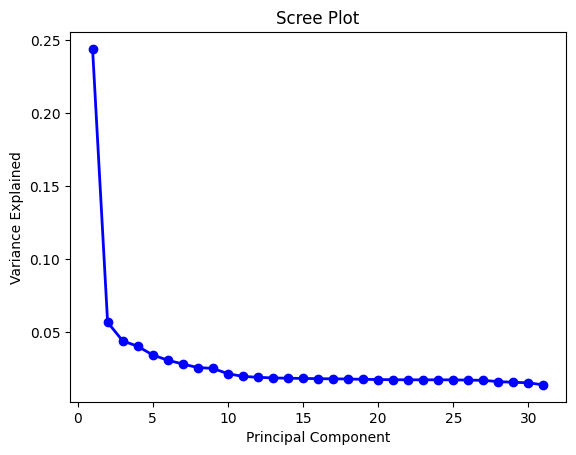

In [26]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Text(0, 0.5, 'Explained variance (%)')

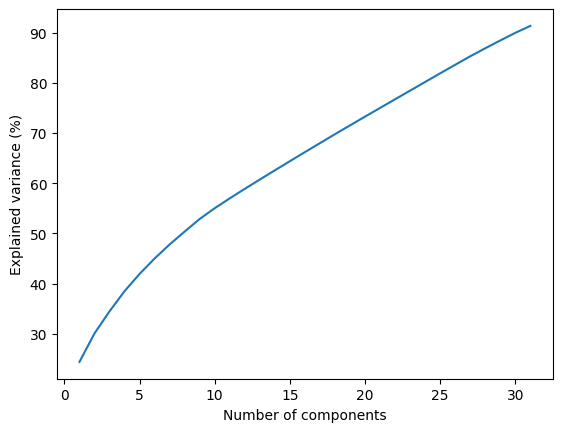

In [27]:
components = len(pca.explained_variance_ratio_)

# Explained Variance Plot
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [32]:
X_pca = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca)
y = pd.DataFrame(y)
pca_df = X_pca.rename(columns=lambda x: f"PC" + str(x+1))
pca_df.insert(0, 'income_range', y.values.flatten())
pca_df

,income_range,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
0,high income,-0.155659,-0.927324,0.201607,-0.143456,0.094108,0.325193,0.570748,3.230030,-2.025328,...,-13.801374,3.146694,21.362224,10.273895,-6.484266,12.271450,-3.753160,5.104304,-3.983611,0.034840
1,low income,0.264198,-0.030747,-1.082848,1.061889,-0.334163,-1.306446,-2.486718,-1.043590,-6.140339,...,48.488807,-0.077030,-71.689120,105.356747,-33.512679,15.789807,1.285478,-0.094551,-9.705739,3.383970
2,high income,0.238948,-1.018801,0.173322,-0.331260,0.050420,0.375578,0.548927,2.849855,-2.815062,...,-13.802863,3.164043,21.405720,10.224289,-6.535084,12.055540,-3.926628,5.017952,-3.546839,-0.065414
3,high income,-0.287805,-0.379268,1.224523,0.093889,0.079183,0.933107,-1.724060,-2.658881,1.303189,...,-18.218846,10.802417,19.019355,39.781197,15.399134,-9.066844,3.942627,-4.069881,0.115605,-1.291471
4,high income,0.493799,-1.228307,0.055329,-0.207674,0.012025,0.168158,0.397534,2.694881,-3.236024,...,-13.829296,3.165238,21.495860,10.209233,-6.407755,12.161594,-3.895882,5.095309,-3.211432,-0.195174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110752,high income,0.512440,-0.793794,-0.111362,-1.333710,-0.054919,-0.438953,-0.178790,1.368709,-0.222147,...,0.049838,0.004260,0.032815,-0.116661,0.029754,-1.130521,0.267406,0.045277,0.460839,-0.350918
110753,middle income,-0.411565,0.217069,0.344600,-0.231494,0.067250,-0.087762,1.407452,-0.013341,1.222918,...,0.043031,-0.007404,0.139241,-0.158290,-0.706715,-0.908677,-0.992831,0.081371,-0.209378,0.947810
110754,high income,-0.270545,0.265016,1.419416,-0.484576,-0.032428,-1.057509,0.570270,-0.452568,0.972752,...,0.006880,0.019507,0.243021,-0.096094,-0.257204,-0.517616,-1.046904,0.168461,-0.071003,0.086479
110755,high income,0.645973,-1.017434,-0.965127,-1.949144,-0.025815,-0.021920,0.162563,1.533974,0.104603,...,0.055765,-0.016068,-0.057338,-0.057237,0.280463,-0.779676,0.334669,0.026532,0.270887,-0.703571


Model 4: Use the Principal Components of the data as features to train the model

In [ ]:
from io import StringIO
# temporarily store the dataframe as a csv in a string variable
temp_csv_string = pca_df.to_csv(sep=";", index=False)
temp_csv_string_IO = StringIO(temp_csv_string)

# create new dataframe from string variable
new_df = pd.read_csv(temp_csv_string_IO, sep=";")

# this new df can be uploaded to BQ with no issues
gbq.to_gbq(new_df, 'outputs.PCA_final_data_test_multiclass', project_id)

LDA Dataset Preparation and Model 5

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

X_lda = lda.fit_transform(X_scaled, y.values.ravel())
X_lda = pd.DataFrame(X_lda)
y = pd.DataFrame(y)
lda_df = X_lda.rename(columns=lambda x: f"LD" + str(x+1))
lda_df.insert(0, 'income_range', y.values.flatten())
lda_df

,income_range,LD1,LD2
0,high income,-1.100140,-0.235497
1,low income,1.999362,2.372725
2,high income,-1.554456,-0.541484
3,high income,-0.809588,2.607588
4,high income,-1.319728,-0.881621
...,...,...,...
110752,high income,-1.227609,0.428184
110753,middle income,0.455823,0.689848
110754,high income,-0.520545,0.992887
110755,high income,-1.166779,0.604690


In [ ]:
from io import StringIO
# temporarily store the dataframe as a csv in a string variable
temp_csv_string = lda_df.to_csv(sep=";", index=False)
temp_csv_string_IO = StringIO(temp_csv_string)

# create new dataframe from string variable
new_df2 = pd.read_csv(temp_csv_string_IO, sep=";")

# this new df can be uploaded to BQ with no issues
gbq.to_gbq(new_df2, 'outputs.LDA_final_data_test_multiclass', project_id)

In [ ]:
# plot points by income range
import matplotlib.pyplot as plt

low = lda_df[lda_df['income_range'] == 'low income']
mid = lda_df[lda_df['income_range'] == 'middle income']
high = lda_df[lda_df['income_range'] == 'high income']

plt.scatter(lda_df['LD1'], lda_df['LD1'], c=y.squeeze().map({'low income': 'red', 'not low income': 'blue'}), s=25, cmap='plasma', alpha = 0.5)
plt.title('LDA: Red=Low, Blue=Middle, Green=High')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

------------------------------------------------------------------------------------------------------------------
SECTION 3:

Prepare and upload test datasets for final_data_training_balanced_binary

In [142]:
Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.outputs.final_data_training_balanced_binary`
'''

project_id = 'berkeley-data-discovery-2023'
dfg = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)
dfg

,per_id_proxy,income_range,per_id_proxy_1,income_range_1,p_city,nem,avg_arrears,avg_monthly_kwh,max_monthly_kwh,avg_month_bill,...,r_morning_over_noon,r_evening_over_noon,r_noon_over_total,r_night_over_day,r_weekday_over_weekend,r_mean_over_max,r_min_over_mean,s_variance,s_diff,s_num_peaks
0,2,low income,2,low income,OAKLAND,No,0.285707,534.687712,695.000,57.495098,...,0.977938,1.173718,0.961545,0.892751,0.979684,0.346269,0.098427,0.039440,0.116293,366
1,4,low income,4,low income,HAYWARD,No,1.397707,284.112212,460.000,29.706275,...,0.779353,1.017171,1.098765,0.607126,0.920486,0.141394,0.325782,0.041149,0.102535,1004
2,6,low income,6,low income,OAKLAND,No,3.321268,453.340000,1811.000,47.562800,...,1.281175,1.464797,0.790303,1.034523,0.892912,0.238084,0.192749,0.086657,0.066768,448
3,8,low income,8,low income,HAYWARD,No,0.735854,756.400314,1684.910,84.254902,...,1.095637,1.157177,0.903942,1.264501,1.109161,0.145973,0.000000,0.922017,0.394139,627
4,15,low income,15,low income,NEWARK,No,0.000000,501.257346,594.587,70.493846,...,0.906618,1.158720,1.022287,0.785728,1.016874,0.174739,0.116181,0.162741,0.136557,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164043,478163,not low income,478163,middle income,BERKELEY,Yes,0.000000,-27.593941,276.977,-6.683846,...,4.251523,7.825022,0.244999,1.028148,1.033517,0.105417,0.000000,0.031580,0.077232,892
164044,478164,not low income,478164,middle income,OAKLAND,No,0.004049,225.672050,410.724,24.903200,...,0.531933,1.090853,1.449571,0.309696,1.040073,0.114913,0.150557,0.052683,0.109518,923
164045,478168,not low income,478168,middle income,FREMONT,No,0.158293,401.258206,930.189,44.700784,...,1.177222,1.068615,0.964378,0.886720,1.058490,0.190915,0.118488,0.329188,0.249185,734
164046,478184,not low income,478184,middle income,LIVERMORE,No,0.000000,1015.784314,1635.000,114.174314,...,0.847077,1.160056,1.006470,0.777073,1.008495,0.193802,0.018489,0.599121,0.316905,578


In [146]:
df2 = dfg.copy()
df2['income_range'].value_counts()

low income        82024
not low income    82024
Name: income_range, dtype: int64

In [147]:
df2['ces_score'] = df2['ces_score'].astype(float)
df2['nem'] = df2['nem'].map({'Yes': 1, 'No': 0})
df2 = df2.drop(columns=['income_range_1'])
df2 = df2.drop(columns=['per_id_proxy_1'])
df2

,per_id_proxy,income_range,p_city,nem,avg_arrears,avg_monthly_kwh,max_monthly_kwh,avg_month_bill,max_month_bill,num_vehicles_owner_total,...,r_morning_over_noon,r_evening_over_noon,r_noon_over_total,r_night_over_day,r_weekday_over_weekend,r_mean_over_max,r_min_over_mean,s_variance,s_diff,s_num_peaks
0,2,low income,OAKLAND,0,0.285707,534.687712,695.000,57.495098,93.79,6,...,0.977938,1.173718,0.961545,0.892751,0.979684,0.346269,0.098427,0.039440,0.116293,366
1,4,low income,HAYWARD,0,1.397707,284.112212,460.000,29.706275,47.34,4,...,0.779353,1.017171,1.098765,0.607126,0.920486,0.141394,0.325782,0.041149,0.102535,1004
2,6,low income,OAKLAND,0,3.321268,453.340000,1811.000,47.562800,130.70,3,...,1.281175,1.464797,0.790303,1.034523,0.892912,0.238084,0.192749,0.086657,0.066768,448
3,8,low income,HAYWARD,0,0.735854,756.400314,1684.910,84.254902,234.38,15,...,1.095637,1.157177,0.903942,1.264501,1.109161,0.145973,0.000000,0.922017,0.394139,627
4,15,low income,NEWARK,0,0.000000,501.257346,594.587,70.493846,95.05,0,...,0.906618,1.158720,1.022287,0.785728,1.016874,0.174739,0.116181,0.162741,0.136557,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164043,478163,not low income,BERKELEY,1,0.000000,-27.593941,276.977,-6.683846,29.62,2,...,4.251523,7.825022,0.244999,1.028148,1.033517,0.105417,0.000000,0.031580,0.077232,892
164044,478164,not low income,OAKLAND,0,0.004049,225.672050,410.724,24.903200,41.84,1,...,0.531933,1.090853,1.449571,0.309696,1.040073,0.114913,0.150557,0.052683,0.109518,923
164045,478168,not low income,FREMONT,0,0.158293,401.258206,930.189,44.700784,129.10,7,...,1.177222,1.068615,0.964378,0.886720,1.058490,0.190915,0.118488,0.329188,0.249185,734
164046,478184,not low income,LIVERMORE,0,0.000000,1015.784314,1635.000,114.174314,220.93,2,...,0.847077,1.160056,1.006470,0.777073,1.008495,0.193802,0.018489,0.599121,0.316905,578


In [148]:
X = df2.iloc[:,2:]
X = pd.get_dummies(X)
y = df2.iloc[:,1]
X

,nem,avg_arrears,avg_monthly_kwh,max_monthly_kwh,avg_month_bill,max_month_bill,num_vehicles_owner_total,TotalNetValue,ces_score,c_total,...,p_city_OAKLAND,p_city_PIEDMONT,p_city_PLEASANTON,p_city_SUNOL,p_city_TRACY,opportunity_flag_High Resource,opportunity_flag_High Segregation & Poverty,opportunity_flag_Highest Resource,opportunity_flag_Low Resource,opportunity_flag_Moderate Resource
0,0,0.285707,534.687712,695.000,57.495098,93.79,6,40353.000000,21.77,0.702753,...,1,0,0,0,0,0,0,0,1,0
1,0,1.397707,284.112212,460.000,29.706275,47.34,4,564090.000000,32.15,0.272268,...,0,0,0,0,0,0,0,0,1,0
2,0,3.321268,453.340000,1811.000,47.562800,130.70,3,90968.000000,52.21,0.413076,...,1,0,0,0,0,0,0,0,1,0
3,0,0.735854,756.400314,1684.910,84.254902,234.38,15,610000.000000,21.31,1.340182,...,0,0,0,0,0,0,0,0,1,0
4,0,0.000000,501.257346,594.587,70.493846,95.05,0,197576.864952,32.85,0.701490,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164043,1,0.000000,-27.593941,276.977,-6.683846,29.62,2,105541.000000,7.27,0.171198,...,0,0,0,0,0,1,0,0,0,0
164044,0,0.004049,225.672050,410.724,24.903200,41.84,1,674330.000000,27.03,0.265680,...,1,0,0,0,0,0,0,0,1,0
164045,0,0.158293,401.258206,930.189,44.700784,129.10,7,458160.000000,24.00,0.764041,...,0,0,0,0,0,0,0,0,0,1
164046,0,0.000000,1015.784314,1635.000,114.174314,220.93,2,340628.000000,6.34,1.386262,...,0,0,0,0,0,1,0,0,0,0


PCA Training Dataset Preparation

In [149]:
#scale features to reduce skew
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#define PCA model to use
pca = PCA(n_components=0.90, whiten=True)

#fit PCA model to data
pca_fit = pca.fit(X_scaled)

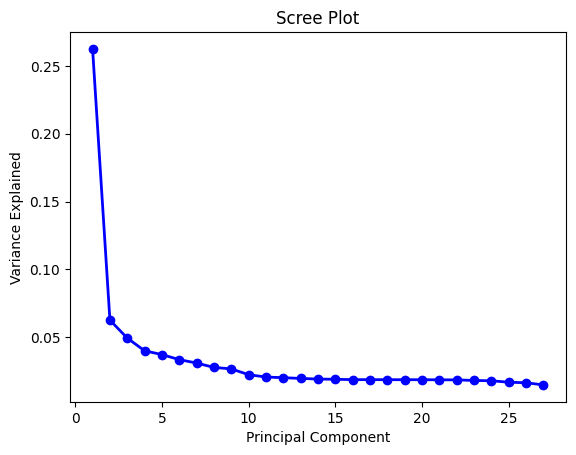

In [150]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Text(0, 0.5, 'Explained variance (%)')

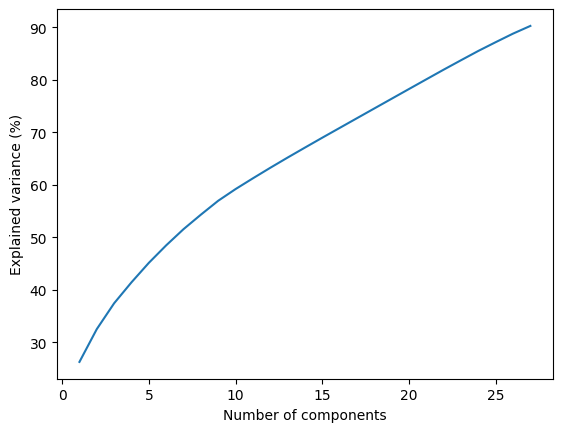

In [151]:
components = len(pca.explained_variance_ratio_)

# Explained Variance Plot
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Model 3: Select the most important features from PCA, remove colinear features (e.g. c_weekday and c_total), and train model.

In [152]:
pca_components = abs(pca.components_)
print('Top 5 most important features in the top 5 principal components')
print('===============================================')
for row in range(5):
    # get the indices of the top 5 values in each row
    temp = np.argpartition(-(pca_components[row]),5)
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:5]
    feature_names = X.columns[indices].to_list()
    values = [pca_components[row][i] for i in indices]
    # print the top 5 feature names
    print(f'Component {row + 1}: {dict(zip(feature_names, values))}')

Top 5 most important features in the top 5 principal components
Component 1: {'c_weekday': 0.2624221766606416, 'c_total': 0.2624100507139746, 'c_weekend': 0.2617207630509219, 'c_day': 0.2595689658709712, 'c_morning': 0.2564769355254618}
Component 2: {'ces_score': 0.3827923866839309, 'opportunity_flag_Low Resource': 0.33900333462820137, 'nem': 0.2738245053832423, 'p_city_OAKLAND': 0.25626182910285106, 't_above_one_kwh': 0.23677422454179298}
Component 3: {'t_above_one_kwh': 0.3212932968174237, 'r_mean_over_max': 0.3093860553213243, 't_above_half_kwh': 0.30180871634193696, 'opportunity_flag_Low Resource': 0.29693989834532764, 't_above_mean_kwh': 0.25207388818455817}
Component 4: {'r_min_over_mean': 0.40750744740263795, 'r_mean_over_max': 0.4059468450747522, 'nem': 0.36679914891704646, 'r_noon_over_total': 0.33405905661423907, 't_above_mean_kwh': 0.2665189425872497}
Component 5: {'r_morning_over_noon': 0.7043552541818915, 'r_evening_over_noon': 0.7043534533806601, 'r_noon_over_total': 0.03

In [153]:
X_pca = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca)
y = pd.DataFrame(y)
pca_df = X_pca.rename(columns=lambda x: f"PC" + str(x+1))
pca_df.insert(0, 'income_range', y.values.flatten())
pca_df

,income_range,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
0,low income,0.082707,0.674273,-1.795340,-1.501075,0.000272,1.020521,0.375292,0.587225,0.262997,...,-0.107419,-0.018561,0.003953,0.183549,-0.561898,0.073570,-0.342514,-0.033760,1.284730,-0.399531
1,low income,-0.461796,1.219490,-0.173092,-0.304816,-0.085156,-1.458275,1.041835,1.125823,-0.056532,...,0.049222,0.025176,-0.003304,0.134750,0.161145,-0.187727,0.364896,0.180290,-0.258146,0.280899
2,low income,-0.182939,1.468962,-1.007264,-0.234790,0.032503,0.851345,0.403442,0.284362,0.162643,...,-0.008885,-0.020178,-0.006882,0.159828,-0.215884,0.579748,-0.100221,-0.333420,0.483209,-1.068057
3,low income,1.086664,-0.649195,-2.576301,-0.027722,-0.212994,-2.661033,0.685603,0.094066,0.343827,...,-0.029995,0.016758,0.006656,0.000943,-0.147859,-0.742684,0.873237,0.469155,1.129415,-0.827510
4,low income,0.070081,0.154152,-0.259862,-0.963704,-0.023303,0.410254,-2.622733,1.658210,-0.568832,...,0.111561,0.074558,0.018831,0.414085,0.057301,-0.284205,-0.423794,-0.916245,0.284587,-0.426431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164043,not low income,-0.591932,-1.173340,0.461297,1.045950,0.216444,1.775218,0.989224,1.824670,2.012020,...,0.233679,-0.012420,0.009832,-0.350463,0.555231,-0.393337,0.228694,-0.038561,-0.383113,-0.137253
164044,not low income,-0.501728,1.281175,0.097689,-0.154344,0.005571,0.410344,0.194335,-0.375869,-0.160642,...,-0.050469,0.026462,0.015001,0.148095,-0.294545,0.112152,-0.778495,-0.270871,0.759141,-0.047967
164045,not low income,0.224595,-0.536729,-0.338195,-0.955532,-0.055383,-0.505256,-1.033759,0.502536,0.311402,...,-0.045230,-0.012181,0.011592,-0.019023,-0.204433,-0.288382,-0.095186,0.833352,0.244995,0.226117
164046,not low income,1.070952,-1.439441,-0.970888,-1.057249,-0.101091,-0.257124,-1.109058,-0.614702,1.115454,...,0.105252,0.001149,-0.035213,0.020306,0.256439,0.294705,0.412615,-1.102830,0.122894,0.984570


Model 4: Use the Principal Components of the data as features to train the model

In [ ]:
from io import StringIO
# temporarily store the dataframe as a csv in a string variable
temp_csv_string = pca_df.to_csv(sep=";", index=False)
temp_csv_string_IO = StringIO(temp_csv_string)

# create new dataframe from string variable
new_df = pd.read_csv(temp_csv_string_IO, sep=";")

# this new df can be uploaded to BQ with no issues
gbq.to_gbq(new_df, 'outputs.PCA_final_data_training_balanced_binary', project_id)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LogisticRegression(multi_class='multinomial', max_iter=1000)
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

# perform a split
random_state = 12
X_train, X_test, y_train, y_test = \
    train_test_split(X_scaled, y.squeeze(), 
                     test_size=0.2,
                     shuffle=True,
                     random_state=random_state)
# train the model using the PCA components
log_regress_model.fit(X_train,y_train)
print(f"Mean accuracy: {log_regress_model.score(X_test,y_test)}")

------------------------------------------------------------------------------------------------------------------
SECTION 4:

Prepare and upload test datasets for final_data_test_binary

In [20]:
Query = '''
SELECT *
FROM `berkeley-data-discovery-2023.outputs.final_data_test_binary`
'''

project_id = 'berkeley-data-discovery-2023'
dfg = gbq.read_gbq(query=Query, dialect ='standard', project_id=project_id)
dfg

,per_id_proxy,income_range,p_city,nem,avg_arrears,avg_monthly_kwh,max_monthly_kwh,avg_month_bill,max_month_bill,num_vehicles_owner_total,...,r_morning_over_noon,r_evening_over_noon,r_noon_over_total,r_night_over_day,r_weekday_over_weekend,r_mean_over_max,r_min_over_mean,s_variance,s_diff,s_num_peaks
0,9026,high income,SUNOL,No,0.000000,360.964437,797.0000,38.352745,66.10,8,...,1.315571,1.883578,0.797113,0.685280,1.108993,0.143047,0.023307,0.133559,0.138367,498
1,12161,low income,TRACY,No,2.144457,459.729730,949.0000,56.874595,139.68,0,...,1.175612,2.429692,0.617513,1.185644,1.038038,0.100237,0.000000,0.668279,0.357095,2032
2,24388,high income,SUNOL,No,0.506976,616.435559,1025.2680,67.848824,119.29,4,...,1.126104,1.594048,0.994840,0.284088,1.146457,0.120646,0.016517,0.445615,0.251049,540
3,27128,high income,Dublin,No,0.431902,333.707725,526.8186,36.356275,61.29,4,...,0.807493,1.343290,1.109075,0.457250,0.950610,0.061967,0.017416,0.122856,0.130191,708
4,40078,high income,SUNOL,No,0.000000,765.066165,1178.0000,85.400784,154.39,3,...,0.669286,1.847754,0.876628,0.521998,1.127725,0.141052,0.014652,0.837135,0.338544,688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110752,477642,high income,CASTRO VALLEY,No,0.290439,708.392139,968.6550,78.420588,132.74,5,...,1.157018,1.554878,0.860385,0.730748,0.990734,0.151797,0.226348,0.531635,0.345829,653
110753,477822,middle income,CASTRO VALLEY,No,1.390585,285.269692,399.7760,31.036471,47.16,1,...,1.036145,2.127882,0.799930,0.471104,0.818500,0.117003,0.136323,0.058364,0.106853,644
110754,477923,high income,CASTRO VALLEY,No,0.036780,328.077310,981.0000,35.685600,75.91,0,...,1.358213,1.549212,0.855121,0.529913,0.824595,0.069911,0.386728,0.203453,0.182119,1096
110755,478061,high income,CASTRO VALLEY,No,0.000000,705.794373,1265.6582,77.327255,173.59,6,...,1.283600,1.643107,0.746565,1.071500,0.996393,0.231578,0.239419,0.421972,0.168699,173


In [21]:
df2 = dfg.copy()
df2['income_range'].value_counts()

high income      36919
low income       36919
middle income    36919
Name: income_range, dtype: int64

In [22]:
df2['ces_score'] = df2['ces_score'].astype(float)
df2['nem'] = df2['nem'].map({'Yes': 1, 'No': 0})
df2 = df2.drop(columns=['income_range_1'])
df2 = df2.drop(columns=['per_id_proxy_1'])
df2

,per_id_proxy,income_range,p_city,nem,avg_arrears,avg_monthly_kwh,max_monthly_kwh,avg_month_bill,max_month_bill,num_vehicles_owner_total,...,r_morning_over_noon,r_evening_over_noon,r_noon_over_total,r_night_over_day,r_weekday_over_weekend,r_mean_over_max,r_min_over_mean,s_variance,s_diff,s_num_peaks
0,9026,high income,SUNOL,0,0.000000,360.964437,797.0000,38.352745,66.10,8,...,1.315571,1.883578,0.797113,0.685280,1.108993,0.143047,0.023307,0.133559,0.138367,498
1,12161,low income,TRACY,0,2.144457,459.729730,949.0000,56.874595,139.68,0,...,1.175612,2.429692,0.617513,1.185644,1.038038,0.100237,0.000000,0.668279,0.357095,2032
2,24388,high income,SUNOL,0,0.506976,616.435559,1025.2680,67.848824,119.29,4,...,1.126104,1.594048,0.994840,0.284088,1.146457,0.120646,0.016517,0.445615,0.251049,540
3,27128,high income,Dublin,0,0.431902,333.707725,526.8186,36.356275,61.29,4,...,0.807493,1.343290,1.109075,0.457250,0.950610,0.061967,0.017416,0.122856,0.130191,708
4,40078,high income,SUNOL,0,0.000000,765.066165,1178.0000,85.400784,154.39,3,...,0.669286,1.847754,0.876628,0.521998,1.127725,0.141052,0.014652,0.837135,0.338544,688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110752,477642,high income,CASTRO VALLEY,0,0.290439,708.392139,968.6550,78.420588,132.74,5,...,1.157018,1.554878,0.860385,0.730748,0.990734,0.151797,0.226348,0.531635,0.345829,653
110753,477822,middle income,CASTRO VALLEY,0,1.390585,285.269692,399.7760,31.036471,47.16,1,...,1.036145,2.127882,0.799930,0.471104,0.818500,0.117003,0.136323,0.058364,0.106853,644
110754,477923,high income,CASTRO VALLEY,0,0.036780,328.077310,981.0000,35.685600,75.91,0,...,1.358213,1.549212,0.855121,0.529913,0.824595,0.069911,0.386728,0.203453,0.182119,1096
110755,478061,high income,CASTRO VALLEY,0,0.000000,705.794373,1265.6582,77.327255,173.59,6,...,1.283600,1.643107,0.746565,1.071500,0.996393,0.231578,0.239419,0.421972,0.168699,173


In [24]:
X = df2.iloc[:,2:]
X = pd.get_dummies(X)
y = df2.iloc[:,1]
X

,nem,avg_arrears,avg_monthly_kwh,max_monthly_kwh,avg_month_bill,max_month_bill,num_vehicles_owner_total,TotalNetValue,ces_score,c_total,...,p_city_SAN LEANDRO,p_city_SAN LORENZO,p_city_SUNOL,p_city_TRACY,p_city_UNION CITY,opportunity_flag_High Resource,opportunity_flag_High Segregation & Poverty,opportunity_flag_Highest Resource,opportunity_flag_Low Resource,opportunity_flag_Moderate Resource
0,0,0.000000,360.964437,797.0000,38.352745,66.10,8,342126.0,6.56,0.479264,...,0,0,1,0,0,1,0,0,0,0
1,0,2.144457,459.729730,949.0000,56.874595,139.68,0,1730002.0,16.38,0.682413,...,0,0,0,1,0,0,0,0,1,0
2,0,0.506976,616.435559,1025.2680,67.848824,119.29,4,550600.0,6.56,0.764048,...,0,0,1,0,0,1,0,0,0,0
3,0,0.431902,333.707725,526.8186,36.356275,61.29,4,0.0,11.58,0.405381,...,0,0,0,0,0,0,0,1,0,0
4,0,0.000000,765.066165,1178.0000,85.400784,154.39,3,644039.0,6.56,1.005335,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110752,0,0.290439,708.392139,968.6550,78.420588,132.74,5,937110.0,13.69,1.002438,...,0,0,0,0,0,1,0,0,0,0
110753,0,1.390585,285.269692,399.7760,31.036471,47.16,1,76446.0,19.73,0.342937,...,0,0,0,0,0,0,0,0,0,1
110754,0,0.036780,328.077310,981.0000,35.685600,75.91,0,459001.0,6.18,0.390456,...,0,0,0,0,0,0,0,0,0,1
110755,0,0.000000,705.794373,1265.6582,77.327255,173.59,6,354804.0,13.97,1.087050,...,0,0,0,0,0,1,0,0,0,0


PCA Training Dataset Preparation

In [25]:
#scale features to reduce skew
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#define PCA model to use
pca = PCA(n_components=0.90, whiten=True)

#fit PCA model to data
pca_fit = pca.fit(X_scaled)

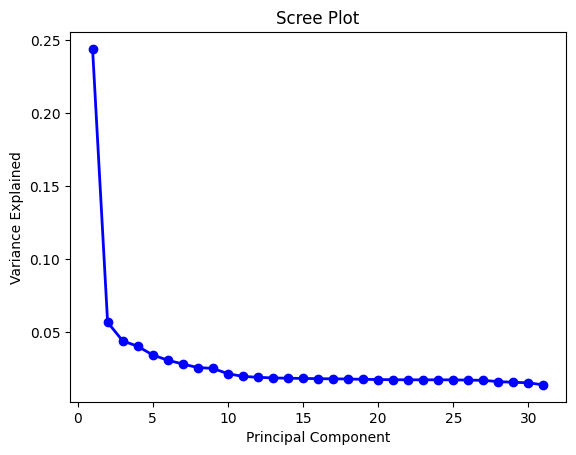

In [26]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Text(0, 0.5, 'Explained variance (%)')

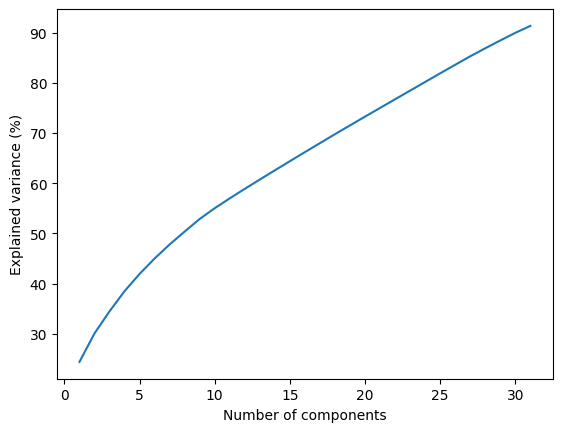

In [27]:
components = len(pca.explained_variance_ratio_)

# Explained Variance Plot
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [32]:
X_pca = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca)
y = pd.DataFrame(y)
pca_df = X_pca.rename(columns=lambda x: f"PC" + str(x+1))
pca_df.insert(0, 'income_range', y.values.flatten())
pca_df

,income_range,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
0,high income,-0.155659,-0.927324,0.201607,-0.143456,0.094108,0.325193,0.570748,3.230030,-2.025328,...,-13.801374,3.146694,21.362224,10.273895,-6.484266,12.271450,-3.753160,5.104304,-3.983611,0.034840
1,low income,0.264198,-0.030747,-1.082848,1.061889,-0.334163,-1.306446,-2.486718,-1.043590,-6.140339,...,48.488807,-0.077030,-71.689120,105.356747,-33.512679,15.789807,1.285478,-0.094551,-9.705739,3.383970
2,high income,0.238948,-1.018801,0.173322,-0.331260,0.050420,0.375578,0.548927,2.849855,-2.815062,...,-13.802863,3.164043,21.405720,10.224289,-6.535084,12.055540,-3.926628,5.017952,-3.546839,-0.065414
3,high income,-0.287805,-0.379268,1.224523,0.093889,0.079183,0.933107,-1.724060,-2.658881,1.303189,...,-18.218846,10.802417,19.019355,39.781197,15.399134,-9.066844,3.942627,-4.069881,0.115605,-1.291471
4,high income,0.493799,-1.228307,0.055329,-0.207674,0.012025,0.168158,0.397534,2.694881,-3.236024,...,-13.829296,3.165238,21.495860,10.209233,-6.407755,12.161594,-3.895882,5.095309,-3.211432,-0.195174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110752,high income,0.512440,-0.793794,-0.111362,-1.333710,-0.054919,-0.438953,-0.178790,1.368709,-0.222147,...,0.049838,0.004260,0.032815,-0.116661,0.029754,-1.130521,0.267406,0.045277,0.460839,-0.350918
110753,middle income,-0.411565,0.217069,0.344600,-0.231494,0.067250,-0.087762,1.407452,-0.013341,1.222918,...,0.043031,-0.007404,0.139241,-0.158290,-0.706715,-0.908677,-0.992831,0.081371,-0.209378,0.947810
110754,high income,-0.270545,0.265016,1.419416,-0.484576,-0.032428,-1.057509,0.570270,-0.452568,0.972752,...,0.006880,0.019507,0.243021,-0.096094,-0.257204,-0.517616,-1.046904,0.168461,-0.071003,0.086479
110755,high income,0.645973,-1.017434,-0.965127,-1.949144,-0.025815,-0.021920,0.162563,1.533974,0.104603,...,0.055765,-0.016068,-0.057338,-0.057237,0.280463,-0.779676,0.334669,0.026532,0.270887,-0.703571


Model 4: Use the Principal Components of the data as features to train the model

In [ ]:
from io import StringIO
# temporarily store the dataframe as a csv in a string variable
temp_csv_string = pca_df.to_csv(sep=";", index=False)
temp_csv_string_IO = StringIO(temp_csv_string)

# create new dataframe from string variable
new_df = pd.read_csv(temp_csv_string_IO, sep=";")

# this new df can be uploaded to BQ with no issues
gbq.to_gbq(new_df, 'outputs.PCA_final_data_test_binary', project_id)